# EXAMEN INTRODUCCION A LA INTELIGENCIA ARTIFICIAL

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Defino una función para particionar los datos en train_size y test_size
def particionar(data,train_size):
    m = data.shape[0]
    porcentaje = (train_size*m)//100
    return data[:porcentaje], data[porcentaje:m]
    

In [3]:
# Defino el MSE
def mse(y_true, y_pred):
    A = np.sum((y_true - y_pred) ** 2)
    mse_ = A/y_true.shape[0]
    return mse_

# 2.-  Pre-procesamiento del dataset

In [4]:
# Importo el dataset
df = pd.read_csv("clase_8_dataset.csv")

In [5]:
df.head()

,-178.22912892785894,44.415465062766685
0,3.191333,11.301068
1,222.632528,34.612523
2,304.313092,46.486071
3,255.004882,44.395526
4,139.863295,30.321485


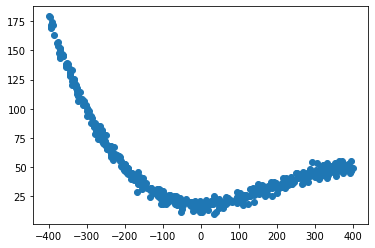

In [8]:
#Visualizo los datos
data = np.array(df)
plt.scatter(data[:,0],data[:, 1])
plt.show()

In [9]:
# Divido los datos en train_set con 80% y test_set con 20%
train_set, test_set = particionar(data,80)

In [10]:
train_set.shape

(399, 2)

In [11]:
test_set.shape

(100, 2)

# 3.- Utilizar regresión polinómica para hacer “fit” sobre la nube de puntos del train. Para este ejercicio, se desea utilizar la fórmula cerrada de la optimización polinómica. El modelo es de la forma y = [Wn … W0] * [X^n    X^(n-1)    …    1]. 


In [12]:
#Defino la funcion que me ayudará a saber cual es el mejor MSE 
def mejor_prediccion(y_pred, y_test, n):    
    mse_data = []
    for i in range(1,n):
        mse_data.append(mse(y_test,y_pred))
        
    
    min_value = min(mse_data)
    min_index = mse_data.index(min_value)    
    return y_pred[min_index], min_value

In [13]:
#Defino la clase para hacer regresion polinomica
class Regresion:
    def __init__(self, grados = 1): 
        self.grados = grados

    def entrenamiento(self, X, y):
        A = []
        B = []
        for i in range(self.grados):
            A_row = []
            for j in range(self.grados):
              potencia_x = []
              for x in X:
                potencia_x.append(x**(i+j))

              A_row.append(np.sum(potencia_x))

            A.append(A_row)
            extra_2 = []
            
            for x in X:
              extra_2.append(x**i)

            extra_3 = np.multiply(extra_2, y)

            B.append(np.sum(extra_3))
            
        w = np.linalg.inv(A) * np.transpose(B)
        self.w = w
    
    def prediccion(self, X): 
        pred = [] 
        for x in X:
            extra_3 = []
            for j, w_j in enumerate(self.w):
                extra_3.append(w_j * x**j)
            pred.append(np.sum(extra_3)) 
        return pred

In [14]:
#Divido los datos en train y test para X e y
X_train_set = train_set[:,0]
y_train_set = train_set[:,1]

X_test_set = test_set[:,0]
y_test_set = test_set[:,1]


In [15]:
# Defino cross validation, que recibe el dataset, el numero K para cross validation y el grado polinomico
def cross_validation(data,k,grad):
    m = data.shape[0]
    train_set, test_set = particionar(data,80)
    X_train_set = train_set[:,0]
    y_train_set = train_set[:,1]

    X_test_set = test_set[:,0]
    y_test_set = test_set[:,1]

    p = int(m/k)
    partes = list(range(0, m, p))
    predicciones = []
    #partes = partes[1:-1]
    for i in range(k):
        if i == k-1:
            rango_a = partes[i]
            data_porcion = data[rango_a: ]
            model = Regresion(grados = grad)
            model.entrenamiento(X_train_set,y_train_set)
            pred = model.prediccion(X_test_set)
            predicciones.append(pred)
    
        else:  
            rango_a = partes[i]
            rango_b = partes[i+1]
            data_porcion = data[rango_a: rango_b]
            model = Regresion(grados = grad)
            model.entrenamiento(X_train_set,y_train_set)
            pred = model.prediccion(X_test_set)
            predicciones.append(pred)
    
    return predicciones    

Empiezo a ver los resultados para cada caso polinomial, del 1 al 5

## Para n =1

In [16]:
predicciones_n_1 = cross_validation(data,5,1)
predicciones_n_1 = np.array(predicciones_n_1)
predicciones_n_1.shape

(5, 100)

In [17]:
mejores_predicciones = []

In [18]:
mejor_fit_n_1, min_value_1 = mejor_prediccion(predicciones_n_1,y_test_set,5)
mejores_predicciones.append(min_value_1)

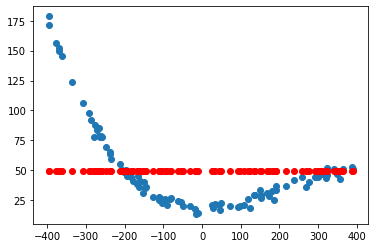

In [19]:
plt.scatter(X_test_set, y_test_set)
plt.scatter(X_test_set, mejor_fit_n_1, c="red")
plt.show()

## Para n = 2

In [20]:
predicciones_n_2 = cross_validation(data,5,2)
predicciones_n_2 = np.array(predicciones_n_2)
predicciones_n_2.shape

(5, 100)

In [21]:
mejor_fit_n_2, min_value_2 = mejor_prediccion(predicciones_n_2,y_test_set,5)
mejores_predicciones.append(min_value_2)

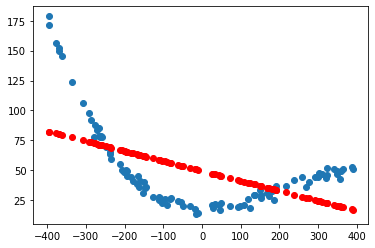

In [22]:
plt.scatter(X_test_set, y_test_set)
plt.scatter(X_test_set, mejor_fit_n_2, c="red")
plt.show()

## Para  n = 3

In [23]:
predicciones_n_3 = cross_validation(data,5,3)
predicciones_n_3 = np.array(predicciones_n_3)
predicciones_n_3.shape

(5, 100)

In [24]:
mejor_fit_n_3, min_value_3 = mejor_prediccion(predicciones_n_3,y_test_set,5)
mejores_predicciones.append(min_value_3)

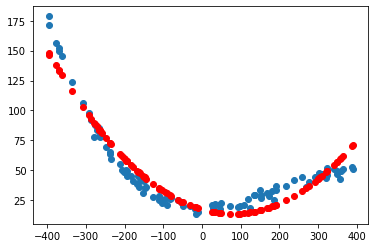

In [25]:
plt.scatter(X_test_set, y_test_set)
plt.scatter(X_test_set, mejor_fit_n_3, c="red")
plt.show()

## Para n = 4

In [26]:
predicciones_n_4 = cross_validation(data,5,4)
predicciones_n_4 = np.array(predicciones_n_4)
predicciones_n_4.shape

(5, 100)

In [27]:
mejor_fit_n_4, min_value_4 = mejor_prediccion(predicciones_n_4,y_test_set,5)
mejores_predicciones.append(min_value_4)

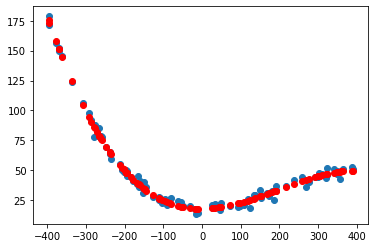

In [28]:
plt.scatter(X_test_set, y_test_set)
plt.scatter(X_test_set, mejor_fit_n_4, c="red")
plt.show()

## Para n = 5

In [29]:
predicciones_n_5 = cross_validation(data,5,5)
predicciones_n_5 = np.array(predicciones_n_5)
predicciones_n_5.shape

(5, 100)

In [30]:
mejor_fit_n_5, min_value_5 = mejor_prediccion(predicciones_n_5,y_test_set,5)
mejores_predicciones.append(min_value_5)

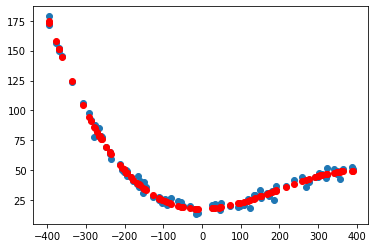

In [31]:
plt.scatter(X_test_set, y_test_set)
plt.scatter(X_test_set, mejor_fit_n_5, c="red")
plt.show()

In [32]:
mejores_predicciones

[6118.671884524845,
 4334.792727429375,
 502.35362532002296,
 43.95139544498198,
 44.124083791046935]

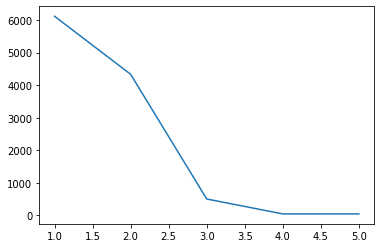

In [33]:
# Realizo un grafico para ver cual polinomio fue el que mejor se ajusto a los datos
num_data = np.array(range(1,6))
plt.plot(num_data, mejores_predicciones)
plt.show()

En base al grafico elijo el polinomio con n=4, que representa un codo no muy sobreajustado

# 4.- Para el mejor modelo seleccionado en (3c) (el mejor “n”), hacer la optimización utilizando Mini-Batch Gradient Descent (partir el train dataset en 4/5 para entrenar y 1/5 para validar)

In [34]:
"""
Defino mi funcion para hacer mini batch, donde los argumentos de entrada son:
data = los datos
batch_size = el tamanño del batch
"""
def mini_batch(data,batch_size):
    m = data.shape[0]
    np.random.shuffle(data)
    train_set, test_set = particionar(data,80)
    X_train_set = train_set[:,0]
    y_train_set = train_set[:,1]

    X_test_set = test_set[:,0]
    y_test_set = test_set[:,1]

    p = int(m/batch_size)
    partes = list(range(0, m, p))
    predicciones = []
    #partes = partes[1:-1]
    
    mini_batches = []
    for i in range(batch_size):
        if i == batch_size-1:
            rango_a = partes[i]
            data_porcion = data[rango_a: ]
            data_porcion = data[rango_a: rango_b]
            mini_batches.append(data_porcion)
        else:  
            rango_a = partes[i]
            rango_b = partes[i+1]
            data_porcion = data[rango_a: rango_b]
            mini_batches.append(data_porcion)
    
    return mini_batches    

### Uso mini batch para el mejor polinomio

In [35]:
# Aplico mini-batch para el polinomio = 4
batch = 32
mini_batches = np.array(mini_batch(data,batch))
mejores_predicciones_2 = []
for i in range(batch-1):
    porcion = mini_batches[i]
    predicciones_n_4 = cross_validation(porcion,5,4)
    predicciones_n_4 = np.array(predicciones_n_4)
    train_set, test_set = particionar(porcion,80)
    y_test_set = test_set[:,1]
    mejor_fit_n_4, max_value_4 = mejor_prediccion(predicciones_n_4,y_test_set,5)
    mejores_predicciones_2.append(max_value_4)

/home/fernando/miniconda3/envs/uba/lib/python3.6/site-packages/ipykernel_launcher.py:3: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  This is separate from the ipykernel package so we can avoid doing imports until
